In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_excel('/home/gauravbhoir147/Documents/Files/Practicals/Galaxy/G4/tf-data.xlsx')


In [4]:
# Define a function to correct the line width
def correct_line_width(W, inclination):
    return W / np.sin(np.radians(inclination))

# Define a function to account for self-extinction
def self_extinction(Wi, log_ab):
    return (1.57 + 2.75 * (np.log10(Wi) - 2.5)) * log_ab

In [5]:
# Correct the line width
data['W_i'] = correct_line_width(data['Line width'], data['Inclination'])

data['A_ext'] = self_extinction(data['W_i'], data['log(a/b)'])


In [6]:
# Correct the apparent magnitude
data['m_corr'] = data['Apparent magnitude'] - data['A_ext'] - data['Galactic extinction']
# Calculate the distance
data['distance_Mpc'] = 10 ** ((data['m_corr'] - data['Absolute magnitude'] + 5) / 5) / 1e6

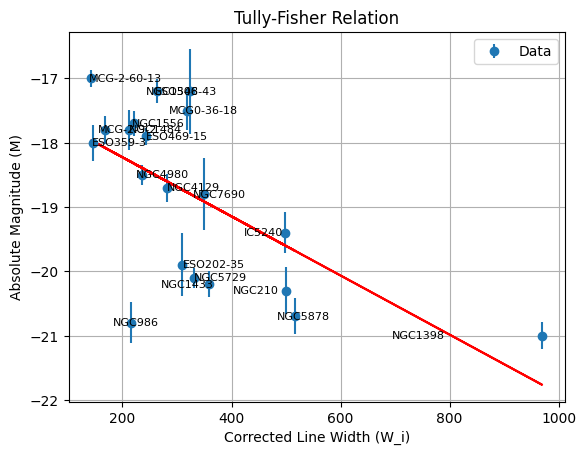

           Name  Line width     m_corr  distance_Mpc
0    MCG0-36-18       285.1  13.998222     19.936290
1       NGC1556       216.9  12.932482     13.381242
2      ESO359-3       144.0  13.782949     22.729493
3       NGC1306       242.4  14.173774     18.825860
4     MCG-2-9-2       155.0  14.016360     23.081928
5       NGC5878       482.6  11.101929     22.929039
6       NGC7690       329.4  12.526937     18.424144
7   MCG-2-60-13       138.0  15.367698     29.753600
8     ESO548-43       259.2  14.931837     26.691155
9       NGC5729       330.9  11.671174     22.606578
10      NGC1484       212.2  13.055451     14.828258
11    ESO469-15       242.4  13.872979     22.625375
12    ESO202-35       310.0  11.927542     23.201089
13      NGC1433       271.0  10.454517     13.517716
14       IC5240       422.5  12.145169     20.372008
15      NGC4980       224.0  12.753183     17.808879
16      NGC1398       693.9  10.072870     16.389816
17       NGC986       181.5  11.364318     27.

In [10]:
# Data for the plot (replace with your actual data)
line_width = data['W_i']
absolute_magnitude = data['Absolute magnitude']

# Perform linear regression
slope, intercept = np.polyfit(line_width, absolute_magnitude, 1)

# Plot the data and the linear fit
plt.errorbar(line_width, absolute_magnitude, yerr=data['Merror'], fmt='o', label='Data')
plt.plot(line_width, slope * line_width + intercept, color='red')

# Annotate each data point with the galaxy name
for i, row in data.iterrows():
    plt.text(row['Line width'], row['Absolute magnitude'], row['Name'],
             fontsize=8, ha='left', va='center', color='black')

# Add labels and title
plt.xlabel('Corrected Line Width (W_i)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Tully-Fisher Relation')
plt.grid(True)
plt.legend()
plt.show()

# Output the results
print(data[['Name', 'Line width', 'm_corr', 'distance_Mpc']])
print(f"Slope of the Tully-Fisher relation: {slope}")
